In [1]:
import pandas as pd

review_df = pd.read_csv("reviews.csv", sep = ",")

In [2]:
review_df.head()

,review,category
0,sangat baik kurang jadwal uji masuk dalam apli...,2
1,untuk widget nya di buat dark theme juga dong,2
2,update min klo bisa dibikib kaya sosmed khusus...,3
3,untuk developer moga depan bisa disetting untu...,2
4,okee lah,1


###### Category usability :

* 1: Effectivenes.
* 2: Efficiency.
* 3: Satisfaction.
* 4: Error.
* 5: Learnability.
* 6: Memorability.
* 7: Cognitive Load.


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    review_df['review'], 
    review_df['category'], 
    test_size = 100,
    random_state = 42)

print("Training dataset: ", X_train.shape[0])
print("Test dataset: ", X_test.shape[0])

Training dataset:  230
Test dataset:  100


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
training_data = vectorizer.fit_transform(X_train)
testing_data = vectorizer.transform(X_test)

In [5]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [6]:
predictions = naive_bayes.predict(testing_data)
predictions

array([1, 5, 1, 4, 1, 1, 1, 1, 2, 4, 4, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1,
       1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 1, 4, 3,
       1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 4, 1, 1, 1, 1, 1, 1, 2, 3, 1, 4,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3], dtype=int64)

In [8]:
from sklearn.metrics import classification_report
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.45      0.97      0.61        34
           2       0.33      0.07      0.11        15
           3       0.88      0.41      0.56        17
           4       0.71      0.62      0.67        16
           5       0.00      0.00      0.00        10
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         4

    accuracy                           0.51       100
   macro avg       0.34      0.30      0.28       100
weighted avg       0.46      0.51      0.43       100



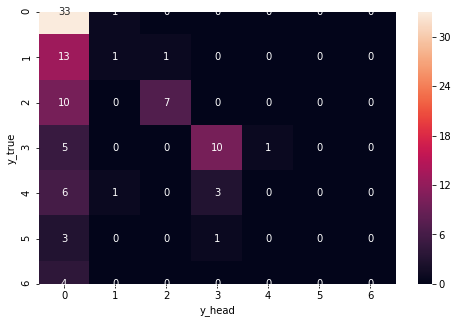

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()